In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
dataFrame = pd.read_csv(r"C:\Users\Akash Pandey\Downloads\Zomato-data-.csv")
dataFrame

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [5]:
# remove '/' from rate column
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

dataFrame['rate']=dataFrame['rate'].apply(handleRate)
dataFrame.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [7]:
#checking null values in dataFrame
dataFrame.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

C:\Users\Akash Pandey\AppData\Local\Temp\ipykernel_20976\949048885.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataFrame['listed_in(type)'], palette=['red', 'green', 'blue'])
C:\Users\Akash Pandey\AppData\Local\Temp\ipykernel_20976\949048885.py:1: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=dataFrame['listed_in(type)'], palette=['red', 'green', 'blue'])


Text(0.5, 0, 'Type of restaurant')

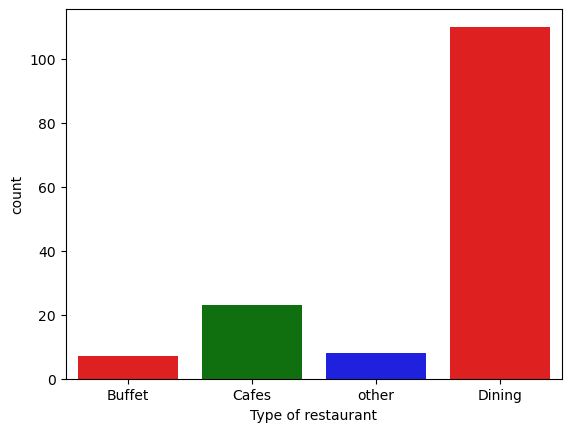

In [9]:
sns.countplot(x=dataFrame['listed_in(type)'], palette=['red', 'green', 'blue'])
plt.xlabel("Type of restaurant")

In [11]:
# votes as per each listed types
grouped_data = dataFrame.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
result

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


Text(0, 0.5, 'votes')

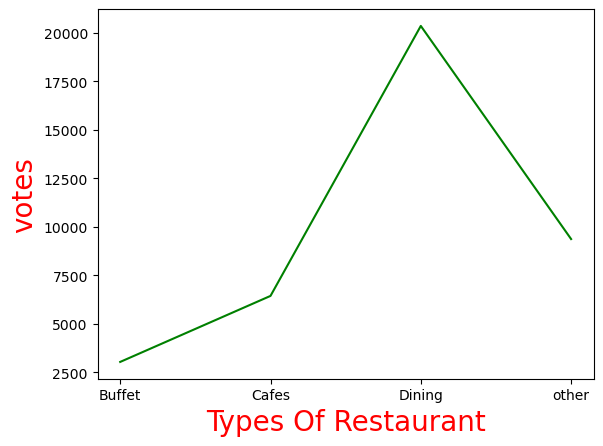

In [13]:
plt.plot(result, c = 'green')
plt.xlabel('Types Of Restaurant', c = 'red', size = 20)
plt.ylabel('votes', c = 'red', size = 20)

In [15]:
# Determine the name of restaurant with max votes
max_votes = dataFrame['votes'].max()
restaurant_with_max_votes = dataFrame.loc[dataFrame['votes'] == max_votes, 'name']
restaurant_with_max_votes

38    Empire Restaurant
Name: name, dtype: object

C:\Users\Akash Pandey\AppData\Local\Temp\ipykernel_20976\1474619054.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataFrame['online_order'], palette=['red', 'green'])


<Axes: xlabel='online_order', ylabel='count'>

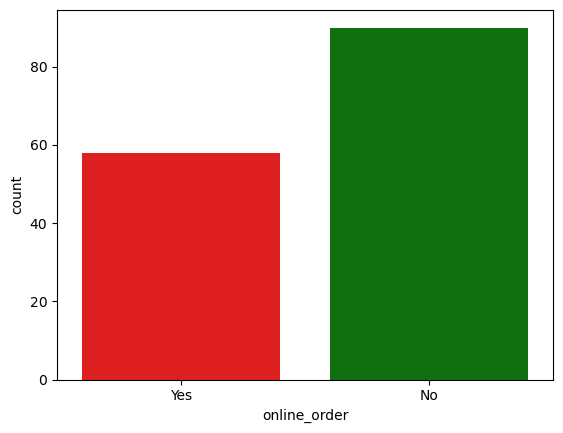

In [17]:
#visualize if online order is > offline or not
sns.countplot(x=dataFrame['online_order'], palette=['red', 'green'])

Text(0.5, 1.0, 'Ratings Distributions')

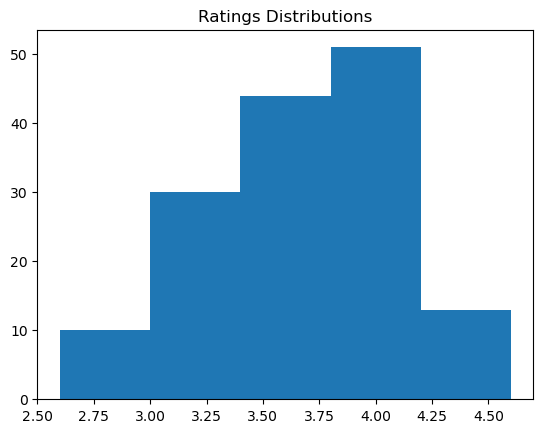

In [19]:
# Ratings Distribution
plt.hist(dataFrame['rate'], bins = 5)
plt.title('Ratings Distributions')

C:\Users\Akash Pandey\AppData\Local\Temp\ipykernel_20976\3543777443.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = dataFrame['approx_cost(for two people)'], palette=['red', 'green', 'blue'])
C:\Users\Akash Pandey\AppData\Local\Temp\ipykernel_20976\3543777443.py:3: UserWarning: 
The palette list has fewer values (3) than needed (18) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x = dataFrame['approx_cost(for two people)'], palette=['red', 'green', 'blue'])


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

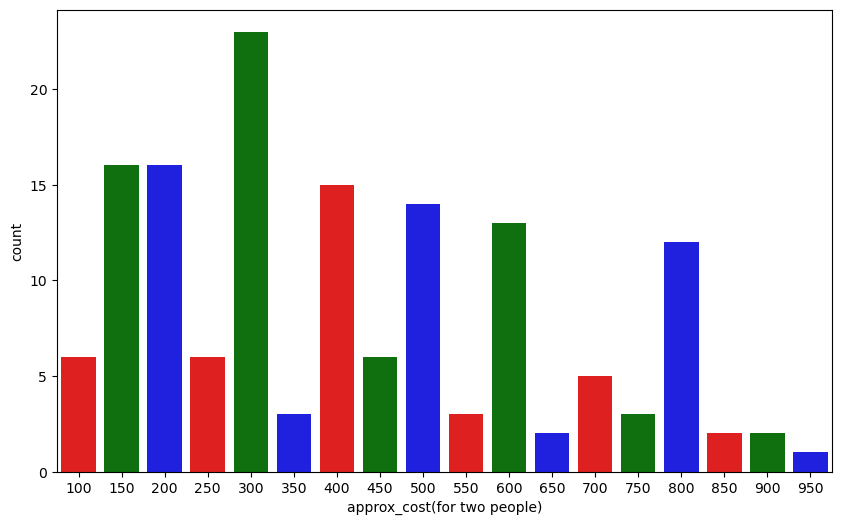

In [21]:
# Approx cost for two people
plt.figure(figsize=(10, 6))
sns.countplot(x = dataFrame['approx_cost(for two people)'], palette=['red', 'green', 'blue'])

<Axes: xlabel='online_order', ylabel='rate'>

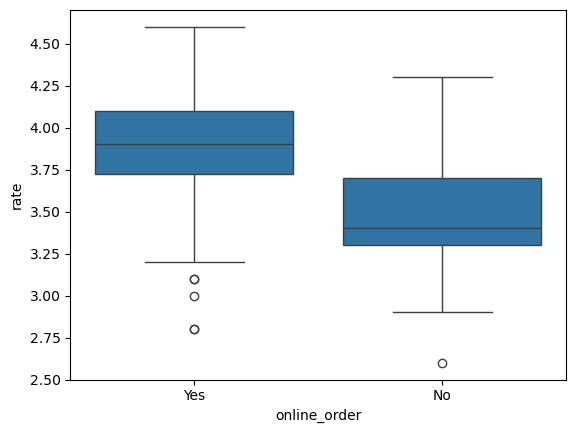

In [21]:
# whether online or offline received more ratings
sns.boxplot(x = dataFrame['online_order'], y = dataFrame['rate'])

Text(50.722222222222214, 0.5, 'Listed In (Type)')

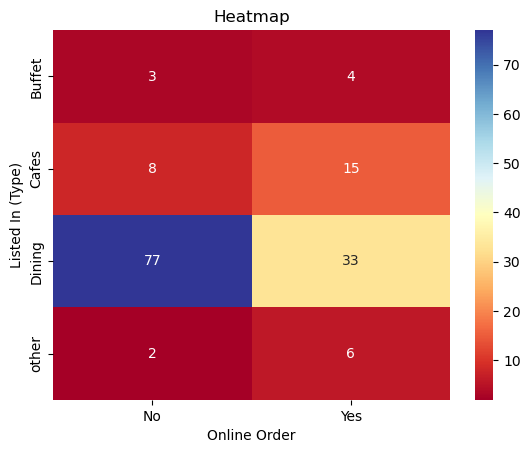

In [23]:
# creating heatmap
pivot_table = dataFrame.pivot_table(index = 'listed_in(type)', columns = 'online_order', aggfunc = 'size', fill_value = 0)
sns.heatmap(pivot_table, annot = True, cmap = 'RdYlBu', fmt = 'd')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')